# GeoPandas
"GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting."

http://geopandas.org/index.html

View the GitHub repository at https://github.com/geopandas/geopandas.

Install geopandas with 
```bash
$ conda install geopandas
```

In [15]:
# examples from https://geopandas.readthedocs.io/en/latest/mapping.html
import geopandas
%matplotlib inline

# read world data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


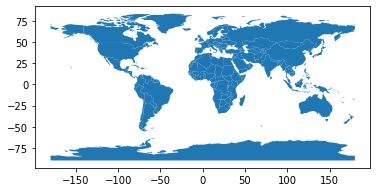

In [2]:
# plot the world data
world.plot()

In [3]:
# filter world
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# create new column gdp_per_capita
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,0.002791
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0.001503
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",0.056823


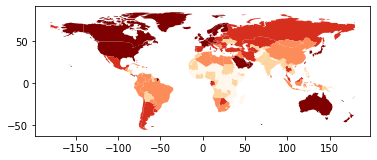

In [14]:
# plot gdp per capita with color map
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

In [7]:
# load city data
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


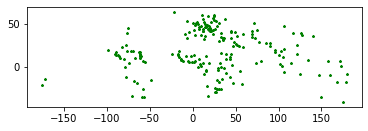

In [6]:
# plot cities
cities.plot(marker='*', color='green', markersize=5);

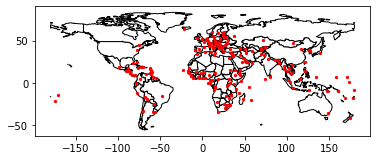

In [13]:
# create base map with borders of the countries
base = world.plot(color='white', edgecolor='black')
# plot cities onto the base map
cities.plot(ax=base, marker='o', color='red', markersize=5)